User Engagement Analysis

In [1]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from sklearn.cluster import KMeans

In [2]:
engagement_df = pd.read_csv('../data/user_overview_clean_df.csv')
engagement_df.head()

,MSISDN/Number,num_xdr sessions,Start ms,End ms,Start,End,Dur. (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,...,Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL),Total(DL/UL),Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,...,292.426453,17.855187,18.355943,3.701304,2.905912,1.570185,345.629377,47.0,76411.0,67.0
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),...,609.920783,35.565545,39.359124,0.937385,4.414096,1.933278,707.185356,70.0,3728.0,42.0
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),...,229.980251,23.751202,34.425237,3.363124,10.229119,1.726277,307.690973,70.0,0.0,15.0
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,1.321510e+09,undefined,undefined,...,810.387875,15.092588,36.534765,2.070983,11.811761,0.657493,889.352748,70.0,41212.0,88.0
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,1.089009e+09,Samsung,Samsung Sm-G390F,...,531.237049,17.539799,34.222253,2.110349,7.748843,0.912788,607.681403,70.0,0.0,15.0


In [3]:
engagement_df.isna().sum()

MSISDN/Number            0
num_xdr sessions         0
Start ms                 0
End ms                   0
Start                    0
End                      0
Dur. (ms)                0
Dur. (ms).1              0
Handset Manufacturer     0
Handset Type             0
Last Location Name       0
IMSI                     0
IMEI                     0
Total DL (Bytes)         0
Total UL (Bytes          0
Other(UL/DL)             0
Gaming(UL/DL)            0
Netflix(UL/DL)           0
Youtube(UL/DL)           0
Email(UL/DL)             0
Google(UL/DL)            0
Social Media(UL/DL)      0
Total(DL/UL)             0
Avg Delay (ms)           0
Activity_Duration(ms)    0
Avg Throughput (kbps)    0
dtype: int64

In [4]:
engagement_df['sessions frequency'] = engagement_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')


In [5]:
engagement_df['sessions frequency'].head()


0    1
1    1
2    1
3    1
4    2
Name: sessions frequency, dtype: int64

In [6]:
new_df = engagement_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [7]:
new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,345.629377,1823652.0,1
1,3.360100e+10,707.185356,1365104.0,1
2,3.360100e+10,307.690973,1361762.0,1
3,3.360101e+10,889.352748,1321509.0,1
4,3.360101e+10,607.681403,1089009.0,2


In [8]:
# The top 10 customers per duration session
new_df = new_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]
top_dur = new_df[['MSISDN/Number', 'Dur. (ms)']].head(10)

In [9]:
top_dur

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.360100e+10,1365104.0
2,3.360100e+10,1361762.0
3,3.360101e+10,1321509.0
4,3.360101e+10,1089009.0
5,3.360101e+10,1074638.0
6,3.360101e+10,1035261.0
7,3.360101e+10,951292.0
8,3.360101e+10,941634.0
9,3.360102e+10,864482.0


In [10]:
top_dur.to_csv('../data/top_ten_session_duration.csv')

Top 10 customers per session frequency

In [11]:

new_df.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
top_freq =new_df[['MSISDN/Number', 'sessions frequency']].head(10)

In [12]:
top_freq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.360452e+10,12
8,3.376041e+10,12
9,3.360313e+10,12


In [13]:
top_freq.to_csv('../data/top_ten_session_frequency.csv')

Top 10 customers on Total Downloads and Uploads

In [ ]:

new_df.sort_values(by='Total(DL/UL)', ascending=False, inplace=True, ignore_index=True)
top_ul_dl = new_df[['MSISDN/Number', 'Total(DL/UL)']].head(10)

In [15]:
top_ul_dl

,MSISDN/Number,Total(DL/UL)
0,3.366317e+10,955.984776
1,3.366755e+10,952.307464
2,3.367575e+10,951.775502
3,3.366558e+10,949.987157
4,3.361325e+10,949.598255
5,3.366286e+10,949.172538
6,3.363204e+10,948.234086
7,3.367149e+10,947.827452
8,3.369810e+10,947.169694
9,3.366705e+10,947.014951


In [16]:
top_ul_dl.to_csv('../data/top_ten_UL_DL.csv')

In [17]:
engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']].describe()

,Total(DL/UL),Dur. (ms),sessions frequency
count,106471.000000,1.064710e+05,106471.000000
mean,496.124309,9.770374e+04,1.394802
std,244.594950,8.388212e+04,0.806994
min,28.956107,7.142000e+03,1.000000
25%,284.875694,4.197000e+04,1.000000
50%,497.209712,8.639900e+04,1.000000
75%,707.544703,1.234930e+05,2.000000
max,955.984776,1.823652e+06,18.000000


Normaization

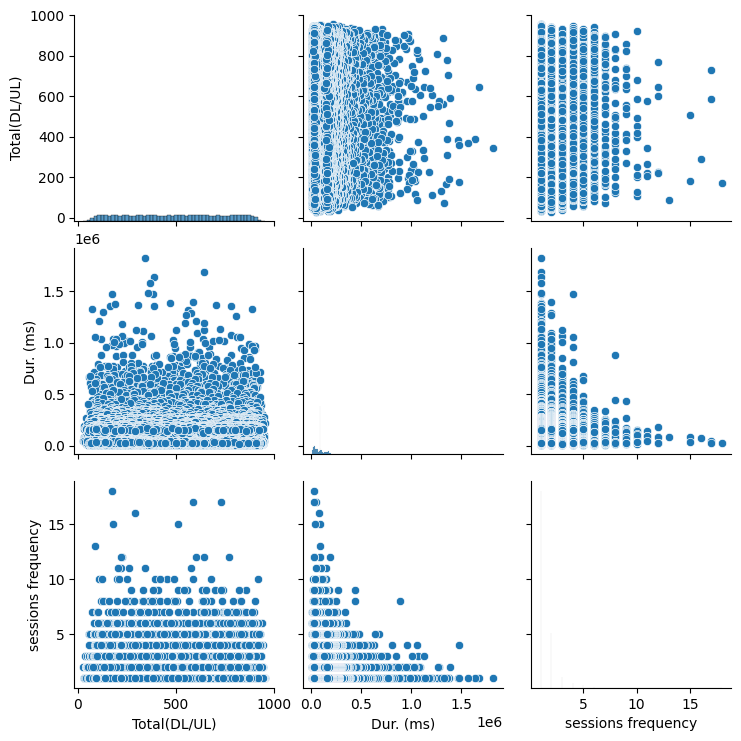

In [18]:
# visualizing columns befor normalization 
import seaborn as sns
%matplotlib inline
sns.pairplot(engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']],palette='set2')

In [19]:
# Noramlizing duration
from sklearn.preprocessing import MinMaxScaler
normalize_column_df = pd.DataFrame(engagement_df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['Dur. (ms)'] = scaled_values

In [20]:
# Normalizing session frequency
normalize_column_df = pd.DataFrame(engagement_df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['sessions frequency'] = scaled_values

In [21]:
# Normalizing total DL/UL
normalize_column_df = pd.DataFrame(engagement_df['Total(DL/UL)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
engagement_df['Total(DL/UL)'] = scaled_values

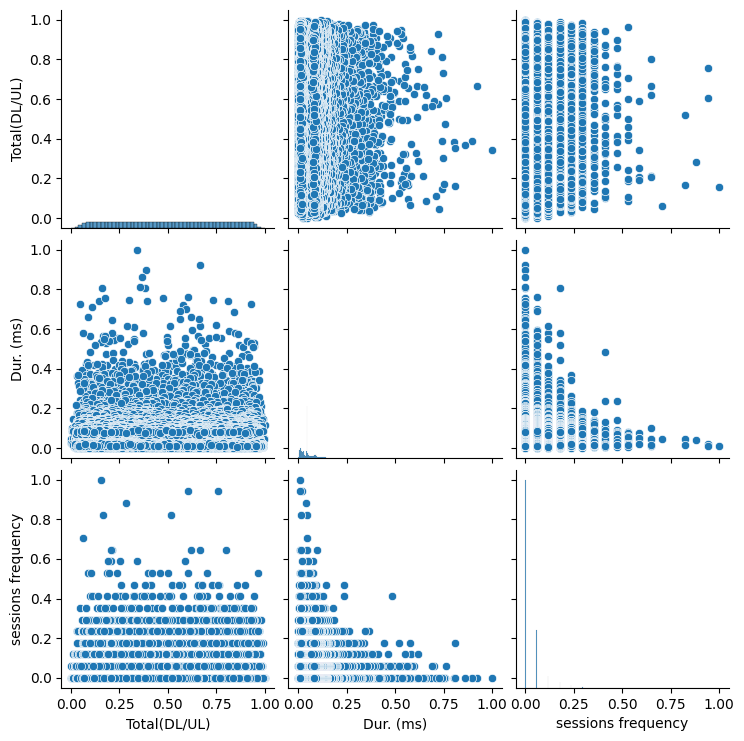

In [22]:
# Columns after normalization
sns.pairplot(engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']],palette='set2')

In [23]:
# description of normalized columns
engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']].describe()

,Total(DL/UL),Dur. (ms),sessions frequency
count,106471.000000,106471.000000,106471.000000
mean,0.503941,0.049855,0.023224
std,0.263848,0.046178,0.047470
min,0.000000,0.000000,0.000000
25%,0.276064,0.019173,0.000000
50%,0.505112,0.043631,0.000000
75%,0.732004,0.064052,0.058824
max,1.000000,1.000000,1.000000


Standardization of columns

In [27]:
eng_df = pd.read_csv('../data/user_overview_clean_df.csv')

In [28]:
eng_df['sessions frequency'] = eng_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')

In [29]:
eng_new_df = eng_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [31]:
eng_new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,345.629377,1823652.0,1
1,3.360100e+10,707.185356,1365104.0,1
2,3.360100e+10,307.690973,1361762.0,1
3,3.360101e+10,889.352748,1321509.0,1
4,3.360101e+10,607.681403,1089009.0,2


In [30]:
from sklearn.preprocessing import StandardScaler
# standardizng total ul/dl
standardized_df = pd.DataFrame(eng_df['Total(DL/UL)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['Total(DL/UL)'] = std_data

In [32]:
# standardizing duration
standardized_df = pd.DataFrame(eng_df['Dur. (ms)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['Dur. (ms)'] = std_data

In [33]:
# standardizing sessions frequency
standardized_df = pd.DataFrame(eng_df['sessions frequency'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
eng_df['sessions frequency'] = std_data

In [34]:
eng_new_df = eng_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [35]:
eng_new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,-0.615285,20.575975,-0.489228
1,3.360100e+10,0.862904,15.109373,-0.489228
2,3.360100e+10,-0.770393,15.069531,-0.489228
3,3.360101e+10,1.607679,14.589653,-0.489228
4,3.360101e+10,0.456091,11.817893,0.749944


In [36]:
eng_new_df.index = eng_new_df['MSISDN/Number']
eng_new_df = eng_new_df.iloc[:,1:4]

In [37]:
eng_new_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-0.615285,20.575975,-0.489228
3.360100e+10,0.862904,15.109373,-0.489228
3.360100e+10,-0.770393,15.069531,-0.489228
3.360101e+10,1.607679,14.589653,-0.489228
3.360101e+10,0.456091,11.817893,0.749944


K-Means Clustering

In [48]:
normal_df = engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [49]:
normal_df.head()

,Total(DL/UL),Dur. (ms),sessions frequency
0,0.341600,1.000000,0.000000
1,0.731616,0.747566,0.000000
2,0.300676,0.745727,0.000000
3,0.928123,0.723567,0.000000
4,0.624280,0.595574,0.058824


In [50]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(normal_df)
label = kmeans.predict(normal_df)

In [51]:
df_kclusture = pd.DataFrame(normal_df)
df_kclusture['clusters'] = label

In [52]:
df_kclusture.head(40)

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
0,0.341600,1.000000,0.000000,2
1,0.731616,0.747566,0.000000,1
2,0.300676,0.745727,0.000000,2
3,0.928123,0.723567,0.000000,1
4,0.624280,0.595574,0.058824,0
5,0.815297,0.587663,0.058824,1
6,0.096579,0.565986,0.058824,2
7,0.868589,0.519760,0.000000,1
8,0.943897,0.514444,0.058824,1
9,0.910470,0.471971,0.000000,1


In [53]:
centroids = kmeans.cluster_centers_

In [54]:
centroids

array([[0.50385706, 0.04974583, 0.02284398],
       [0.80852042, 0.04994051, 0.02343439],
       [0.1980137 , 0.04987944, 0.02339788]])

In [55]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

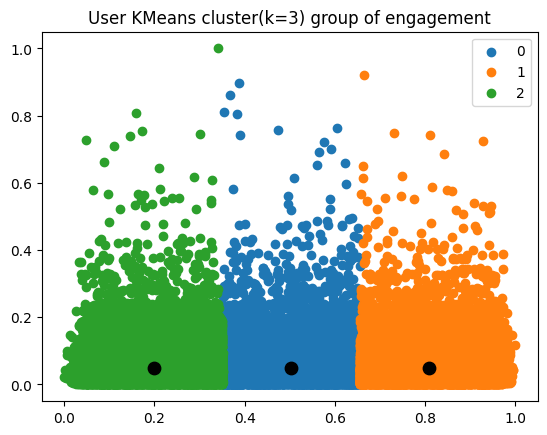

In [59]:
plt.title('User KMeans cluster(k=3) group of engagement')
for i in u_labels:
    plt.scatter(normal_df[label == i].iloc[:,0] , normal_df[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()

MIN,MAX,MEAN and Tota non-normalized metrics

In [57]:
# forming cluster dataframe
cm = pd.DataFrame()
cm['index_d'] = normal_df.index.values
cm['cluster'] = kmeans.labels_

In [58]:
# cluster 1
nor_cluster1 = cm[cm.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = normal_df.loc[nor_cluster1,:]

In [60]:
# cluster 2
nor_cluster2 = cm[cm.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = normal_df.loc[nor_cluster2,:]

In [66]:
# cluster 2
nor_cluster3 = cm[cm.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = normal_df.loc[nor_cluster3,:]

In [63]:
# Description of cluster 1
#cluster_1_df.head()
cluster_1_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35715.000000,35715.000000,35715.000000,35715.0
mean,0.503815,0.049757,0.022851,0.0
std,0.088421,0.046391,0.046614,0.0
min,0.350892,0.000000,0.000000,0.0
25%,0.427027,0.019087,0.000000,0.0
50%,0.504391,0.043631,0.000000,0.0
75%,0.580852,0.063360,0.058824,0.0
max,0.656247,0.896137,0.941176,0.0


In [64]:
# Description of cluster 2
cluster_2_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35466.000000,35466.000000,35466.000000,35466.0
mean,0.808272,0.049931,0.023429,1.0
std,0.088138,0.045832,0.047574,0.0
min,0.655941,0.000002,0.000000,1.0
25%,0.732156,0.019237,0.000000,1.0
50%,0.808796,0.043631,0.000000,1.0
75%,0.883332,0.064863,0.058824,1.0
max,1.000000,0.920816,0.941176,1.0


In [67]:
# Description of cluster 3
cluster_3_df.describe()

,Total(DL/UL),Dur. (ms),sessions frequency,clusters
count,35290.000000,35290.000000,35290.000000,35290.0
mean,0.198221,0.049877,0.023394,2.0
std,0.088142,0.046309,0.048218,0.0
min,0.000000,0.000026,0.000000,2.0
25%,0.122578,0.019185,0.000000,2.0
50%,0.197747,0.043631,0.000000,2.0
75%,0.274528,0.063908,0.058824,2.0
max,0.351246,1.000000,1.000000,2.0


Non-normalized metrics

In [68]:
non_normal_df = pd.read_csv('../data/user_overview_clean_df.csv')

In [69]:
non_normal_df['sessions frequency'] = non_normal_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')

In [70]:
non_normal_df2 = non_normal_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [71]:
non_normal_df2.head()

,Total(DL/UL),Dur. (ms),sessions frequency
0,345.629377,1823652.0,1
1,707.185356,1365104.0,1
2,307.690973,1361762.0,1
3,889.352748,1321509.0,1
4,607.681403,1089009.0,2
